In [4]:
import numpy as np
import pandas as pd
#import researchpy as rp
import os
pd.options.display.max_rows = None
pd.options.display.max_columns = None
import seaborn as sns
import matplotlib.pyplot as plt 

In [5]:
df=pd.read_csv("Wholesale+Customers+Data.csv")

##### Introducing new variable Total_spending

In [12]:
df["Total"] = df['Fresh']+df['Milk']+df['Grocery']+df['Frozen']+df['Detergents_Paper']+df['Delicatessen']

In [13]:
df.head(11)

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100
5,6,Retail,Other,9413,8259,5126,666,1795,1451,26710
6,7,Retail,Other,12126,3199,6975,480,3140,545,26465
7,8,Retail,Other,7579,4956,9426,1669,3321,2566,29517
8,9,Hotel,Other,5963,3648,6192,425,1716,750,18694
9,10,Retail,Other,6006,11093,18881,1159,7425,2098,46662


1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel seems to spend more? Which Region and which Channel seems to spend less?

In [14]:
df.groupby(['Region']).sum()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
Region,,,,,,,,
Lisbon,18095,854833,422454,570037,231026,204136,104327,2386813
Oporto,14899,464721,239144,433274,190132,173311,54506,1555088
Other,64026,3960577,1888759,2495251,930492,890410,512110,10677599


In [15]:
df.groupby(['Channel']).sum()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
Channel,,,,,,,,
Hotel,71034,4015717,1028614,1180717,1116979,235587,421955,7999569
Retail,25986,1264414,1521743,2317845,234671,1032270,248988,6619931


### Descriptive Statistics

In [57]:
df1=df

df.describe()


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,33226.136364
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,26356.301730
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,904.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,17448.750000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,27492.000000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,41307.500000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000,199891.000000


##### Calculating Mean across Region and Channel
1.2. There are 6 different varieties of items are considered. Do all varieties show similar behavior across Region and Channel?

In [6]:
#df1.drop('Buyer/Spender',axis=1,inplace=True)
#df1.drop('Total',axis=1,inplace=True)

df1_mean=pd.pivot_table(df,index=['Region','Channel'],aggfunc='mean',margins=True,margins_name='Total')
df1_mean

Buyer/Spender  Delicatessen  Detergents_Paper         Fresh  \
Region Channel                                                                
Lisbon Hotel       237.728814   1197.152542        950.525424  12902.254237   
       Retail      226.055556   1871.944444       8225.277778   5200.000000   
Oporto Hotel       321.000000   1105.892857        482.714286  11650.535714   
       Retail      311.105263   1239.000000       8410.263158   7289.789474   
Other  Hotel       227.582938   1518.284360        786.682464  13878.052133   
       Retail      152.438095   1826.209524       6899.238095   9831.504762   
Total              220.500000   1524.870455       2881.493182  12000.297727   

                     Frozen       Grocery          Milk  
Region Channel                                           
Lisbon Hotel    3127.322034   4026.135593   3870.203390  
       Retail   2584.111111  18471.944444  10784.000000  
Oporto Hotel    5745.035714   4395.500000   2304.250000  
       Retail   1540.578947  16326.315789   9190.789474  
Other  Hotel    3656.900474   3886.734597   3486.981043  
       Retail   1513.200000  15953.809524  10981.009524  
Total           3071.931818   7951.277273   5796.265909

### Region and Channel wise Separate Central Tendencies

In [48]:
dfReg_mean=pd.pivot_table(df,index=['Region'],aggfunc='mean',margins=True,margins_name='Total')
dfReg_mean.round(1)

,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk,Total
Region,,,,,,,
Lisbon,1354.9,2651.1,11101.7,3000.3,7403.1,5486.4,30997.6
Oporto,1159.7,3687.5,9887.7,4045.4,9218.6,5088.2,33087.0
Other,1620.6,2817.8,12533.5,2944.6,7896.4,5977.1,33789.9
Total,1524.9,2881.5,12000.3,3071.9,7951.3,5796.3,33226.1


In [49]:
dfChan_mean=pd.pivot_table(df,index=['Channel'],aggfunc='mean',margins=True,margins_name='Total')
dfChan_mean.round(1)

,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk,Total
Channel,,,,,,,
Hotel,1416.0,790.6,13475.6,3748.3,3962.1,3451.7,26844.2
Retail,1753.4,7269.5,8904.3,1652.6,16322.9,10716.5,46619.2
Total,1524.9,2881.5,12000.3,3071.9,7951.3,5796.3,33226.1


In [55]:
dfReg_median=pd.pivot_table(df,index=['Region'],aggfunc='median',margins=True,margins_name='Total')
dfReg_median.round(1)

,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk,Total
Region,,,,,,,
Lisbon,806.0,737.0,7363.0,1801,3838.0,3748.0,25385
Oporto,898.0,811.0,8090.0,1455,6114.0,2374.0,26953
Other,994.0,856.0,8752.5,1498,4732.0,3684.5,28029
Total,965.5,816.5,8504.0,1526,4755.5,3627.0,27492


In [41]:
dfChan_median=pd.pivot_table(df,index=['Channel'],aggfunc='median',margins=True,margins_name='Total')
dfChan_median

,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk,Total
Channel,,,,,,,
Hotel,821.0,385.5,9581.5,2057.5,2684.0,2157,21254.5
Retail,1350.0,5614.5,5993.5,1081.0,12390.0,7812,37139.0
Total,965.5,816.5,8504.0,1526.0,4755.5,3627,27492.0


In [56]:
dfReg_std=pd.pivot_table(df,index=['Region'],aggfunc='std',margins=True,margins_name='Total')
dfReg_std.round()

,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk,Total
Region,,,,,,,
Lisbon,1345.0,4208.0,11557.0,3092.0,8496.0,5705.0,20322.0
Oporto,1051.0,6515.0,8388.0,9152.0,10843.0,5826.0,24235.0
Other,3233.0,4593.0,13389.0,4260.0,9537.0,7935.0,27949.0
Total,2820.0,4768.0,12647.0,4855.0,9503.0,7380.0,26356.0


In [53]:
dfChan_std=pd.pivot_table(df,index=['Channel'],aggfunc='std',margins=True,margins_name='Total')
dfChan_std.round(1)

,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk,Total
Channel,,,,,,,
Hotel,3147.4,1104.1,13831.7,5643.9,3545.5,4352.2,22164.8
Retail,1953.8,6291.1,8987.7,1812.8,12267.3,9679.6,29346.9
Total,2820.1,4767.9,12647.3,4854.7,9503.2,7380.4,26356.3


In [452]:
##### Bar Plot 

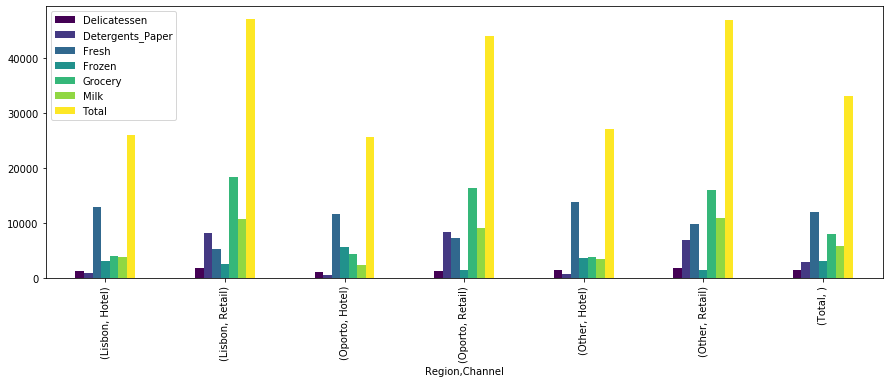

In [70]:
df1_mean.plot(kind='bar',figsize =(15,5),colormap='viridis' )
plt.show()

In [14]:

df1_median=pd.pivot_table(df,index=['Region','Channel'],aggfunc='median',margins=True,margins_name='Total')
df1_median.round(2)

Delicatessen  Detergents_Paper  Fresh  Frozen  Grocery  \
Region Channel                                                           
Lisbon Hotel           749.0             412.0   8656  1859.0   2576.0   
       Retail         1414.0            6177.0   2926  1522.0  16106.0   
Oporto Hotel           883.0             325.0   9787  2696.5   3352.0   
       Retail         1037.0            6236.0   6468   934.0  12469.0   
Other  Hotel           823.0             375.0   9612  1960.0   2642.0   
       Retail         1386.0            5121.0   7362  1059.0  12121.0   
Total                  965.5             816.5   8504  1526.0   4755.5   

                  Milk    Total  
Region Channel                   
Lisbon Hotel    2280.0  22287.0  
       Retail   8866.0  41989.0  
Oporto Hotel    1560.5  22134.5  
       Retail   6817.0  36446.0  
Other  Hotel    2247.0  19789.0  
       Retail   7845.0  37085.0  
Total           3627.0  27492.0

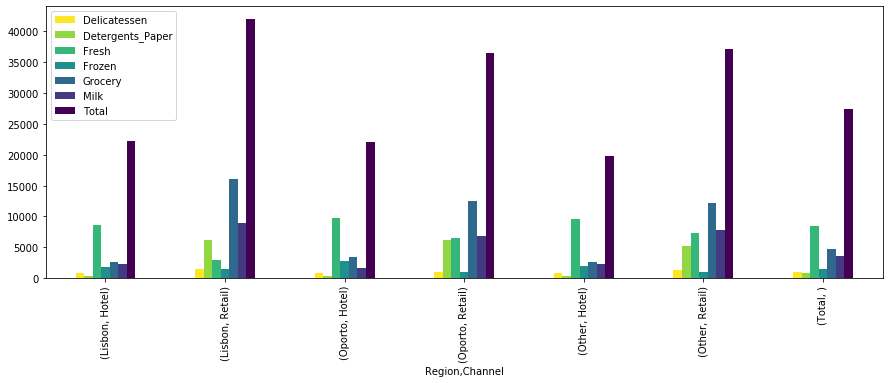

In [69]:
df1_median.plot(kind='bar',figsize =(15,5),colormap='viridis_r' )
plt.show()

#### Calculating Standard Deviation across Region and Channel

In [16]:

df1_std=pd.pivot_table(df,index=['Region','Channel'],aggfunc='std',margins=True,margins_name='Total')
df1_std

Delicatessen  Detergents_Paper         Fresh        Frozen  \
Region Channel                                                               
Lisbon Hotel     1219.945304       1305.907616  12342.008901   3276.460124   
       Retail    1626.486667       5515.878798   5415.521495   2424.774577   
Oporto Hotel     1056.778800        425.310506   8969.362752  11454.478518   
       Retail    1065.438042       8286.748255   6867.934548   2473.266471   
Other  Hotel     3663.183304       1099.970640  14746.572913   4956.590848   
       Retail    2119.052222       6022.091110   9635.394129   1504.498737   
Total            2820.105937       4767.854448  12647.328865   4854.673333   

                     Grocery          Milk         Total  
Region Channel                                            
Lisbon Hotel     3629.644143   4298.321195  16484.700897  
       Retail   10414.687844   6609.221463  23646.468894  
Oporto Hotel     3048.298815   2968.628697  22572.594954  
       Retail   14035.453775   6611.354136  22928.934726  
Other  Hotel     3593.506056   4508.505269  23532.179828  
       Retail   12298.935356  10574.827178  31365.497377  
Total            9503.162829   7380.377175  26356.301730

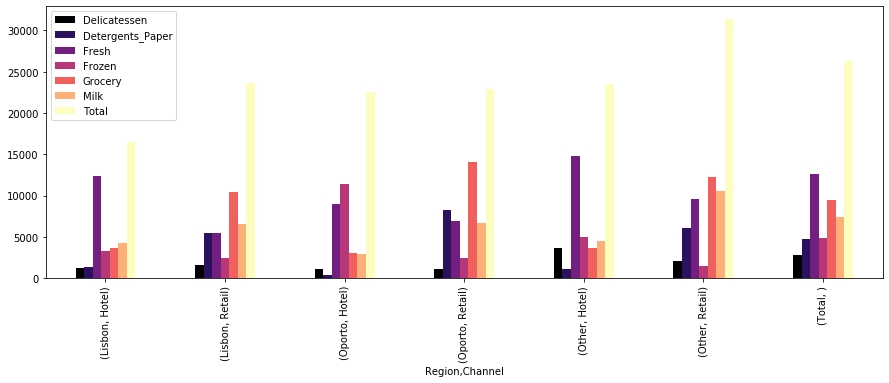

In [71]:
df1_std.plot(kind='bar',figsize =(15,5),colormap='magma' )
plt.show()

## 1.3 On the basis of the descriptive measure of variability, which item shows the most inconsistent behavior? Which items shows the least inconsistent behavior?

#### Coefficient of Variation as Percentage

#CV is used for comparing variablity across two or more variables as CV is dimensionless and is corrected for the size in the mean values.

Due to extreme outliers COV is performed on median .

In [19]:
dft=df.describe().T
dft

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,220.500000,127.161315,1.0,110.75,220.5,330.25,440.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0
Total,440.0,33226.136364,26356.301730,904.0,17448.75,27492.0,41307.50,199891.0


In [18]:
dft['range']=dft['max']-dft['min']
dft['iqr'] = dft['75%'] - dft['25%']
dft['cov'] = dft['iqr'] / dft['50%']
dft['cv'] = dft['std'] / dft['mean']
dft

,count,mean,std,min,25%,50%,75%,max,range,iqr,cov,cv
Buyer/Spender,440.0,220.500000,127.161315,1.0,110.75,220.5,330.25,440.0,439.0,219.50,0.995465,0.576695
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0,112148.0,13806.00,1.623471,1.053918
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0,73443.0,5657.25,1.559760,1.273299
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0,92777.0,8502.75,1.787982,1.195174
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0,60844.0,2812.00,1.842726,1.580332
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0,40824.0,3665.25,4.488977,1.654647
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0,47940.0,1412.00,1.462455,1.849407
Total,440.0,33226.136364,26356.301730,904.0,17448.75,27492.0,41307.50,199891.0,198987.0,23858.75,0.867843,0.793240


In [20]:
measure1 = (df1_std/df1_mean)
measure1

Delicatessen  Detergents_Paper     Fresh    Frozen   Grocery  \
Region Channel                                                                 
Lisbon Hotel        1.019039          1.373880  0.956578  1.047689  0.901521   
       Retail       0.868876          0.670601  1.041446  0.938340  0.563811   
Oporto Hotel        0.955589          0.881081  0.769867  1.993805  0.693504   
       Retail       0.859918          0.985314  0.942131  1.605414  0.859683   
Other  Hotel        2.412712          1.398240  1.062582  1.355408  0.924557   
       Retail       1.160355          0.872863  0.980053  0.994250  0.770909   
Total               1.849407          1.654647  1.053918  1.580332  1.195174   

                    Milk     Total  
Region Channel                      
Lisbon Hotel    1.110619  0.632237  
       Retail   0.612873  0.501651  
Oporto Hotel    1.288328  0.878861  
       Retail   0.719346  0.521151  
Other  Hotel    1.292954  0.864720  
       Retail   0.963010  0.667280  
Total           1.273299  0.793240

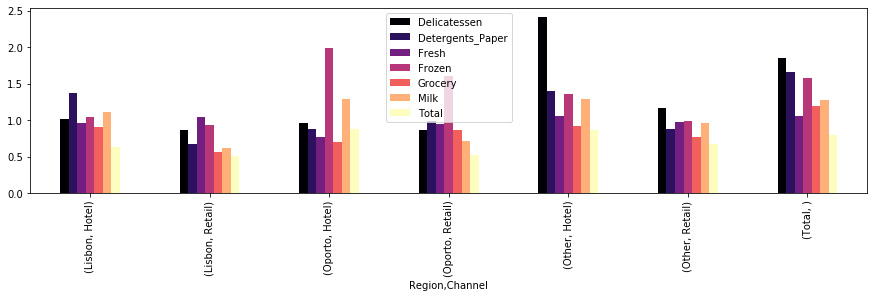

In [21]:
measure1.plot(kind='bar',figsize =(15, 3.4),colormap='magma' )
plt.show()

In [27]:
nf = df.dtypes[df.dtypes != 'object'].index
nf

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicatessen', 'Total'],
      dtype='object')

In [28]:
# We will use a function melt()
# Signature: melt(dataframe, identifier column, value columns)

melt_data = pd.melt(df, id_vars=['Region','Channel'], value_vars=nf[nf !='Total'])
melt_data=melt_data.rename(columns={'variable':'Items'})
melt_data.head()

,Region,Channel,Items,value
0,Other,Retail,Fresh,12669
1,Other,Retail,Fresh,7057
2,Other,Retail,Fresh,6353
3,Other,Hotel,Fresh,13265
4,Other,Retail,Fresh,22615


### 1.4. Are there any outliers in the data?

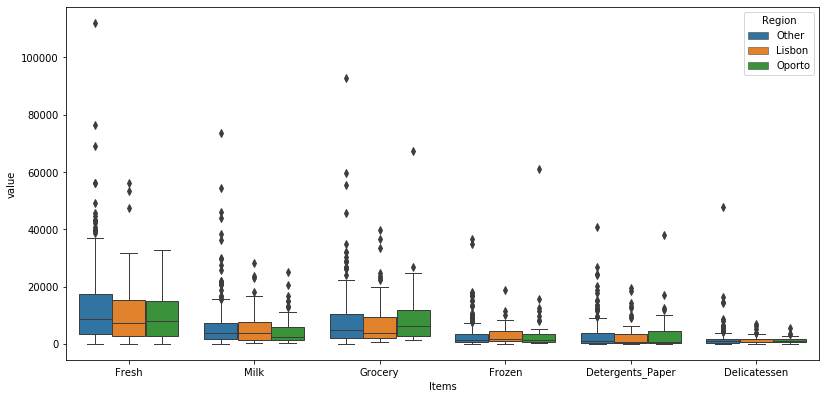

In [29]:
fig=plt.figure(figsize =(13.5,6.5)) 
sns.boxplot(y='value', x='Items',data=melt_data,hue='Region',linewidth=1,palette="tab10")
plt.show()


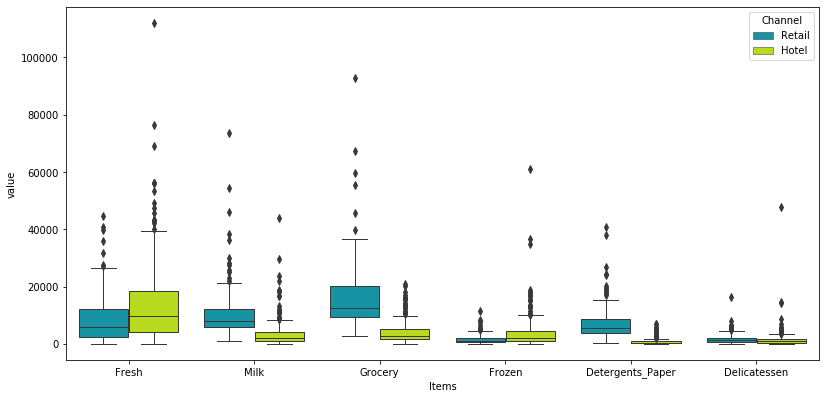

In [30]:
fig=plt.figure(figsize =(13.5,6.5)) 
sns.boxplot(y='value', x='Items',data=melt_data,hue='Channel',linewidth=1,palette="nipy_spectral")
plt.show()
